In [1]:
import cartopy
import xarray as xr
import cf_xarray
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go

Read the netCDF file and slice out the region of interest

In [2]:
xr.set_options(keep_attrs=True)
ds = xr.open_dataset('compday.BlG2vFdq3X.nc')
data = ds['air'].sel(lat=slice(90,20), lon=slice(0, 125))
data

<xarray.DataArray 'air' (time: 1, lat: 29, lon: 51)> Size: 6kB
[1479 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 116B 90.0 87.5 85.0 82.5 80.0 ... 27.5 25.0 22.5 20.0
  * lon      (lon) float32 204B 0.0 2.5 5.0 7.5 10.0 ... 117.5 120.0 122.5 125.0
  * time     (time) datetime64[ns] 8B 2017-12-01
Attributes:
    long_name:     Air Temperature
    actual_range:  [ -3.650581 377.2     ]
    units:         degK
    precision:     99
    var_desc:      Air Temperature
    dataset:       CDC Derived NCEP Reanalysis Products
    level_desc:    Surface
    statistic:     Composite
    parent_stat:   Other

Contour plot with range values close to those in the exmaple plot.

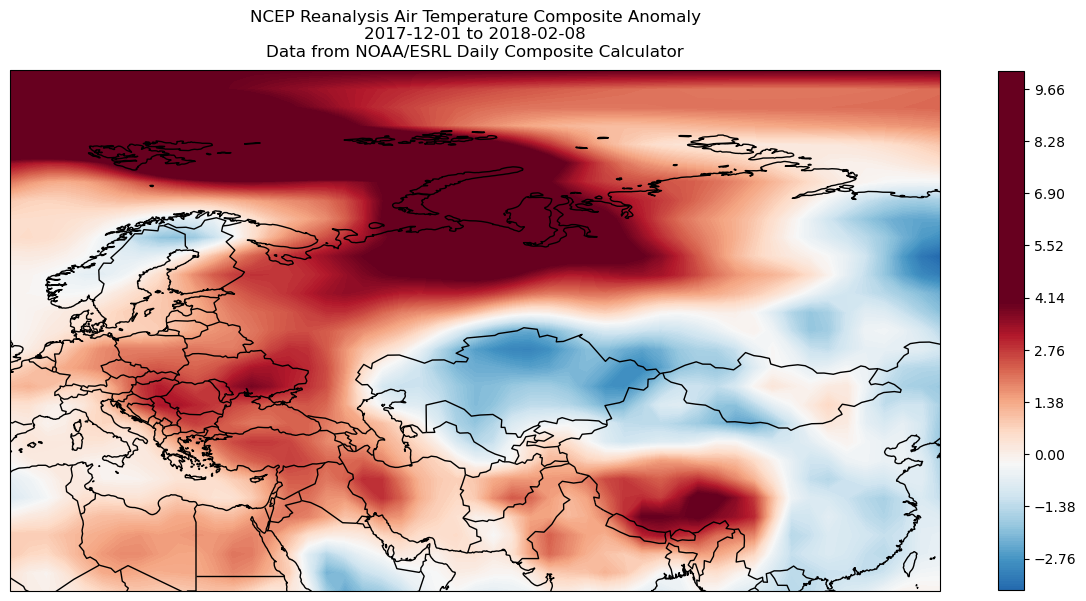

In [3]:
plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines('50m')
ax.add_feature(cartopy.feature.BORDERS) 
min = data[0,:,:].min()
max = data[0,:,:].max()
ct = ax.contourf(data['lon'], data.cf['lat'], data[0,:,:], transform=proj180, cmap='RdBu_r', levels =255, vmin=-4.5, vmax=4)
plt.colorbar(ct, orientation='vertical', shrink=.45)
plt.title('NCEP Reanalysis Air Temperature ' + ds.attrs['title'] + '\n2017-12-01 to 2018-02-08\nData from NOAA/ESRL Daily Composite Calculator', y=1.01)
plt.savefig('air1.png')

Set the color bar range to match the data being plotted.

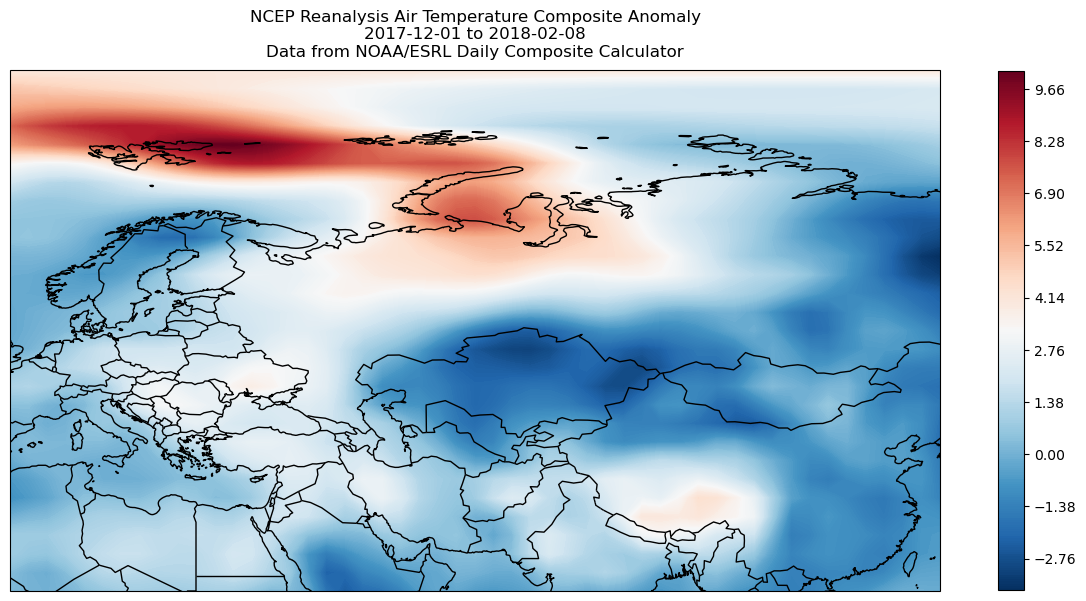

In [10]:
plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines('50m')
ax.add_feature(cartopy.feature.BORDERS) 
min = data[0,:,:].min().item()
max = data[0,:,:].max().item()
ct = ax.contourf(data['lon'], data.cf['lat'], data[0,:,:], transform=proj180, cmap='RdBu_r', levels =255, vmin=min, vmax=max)
plt.colorbar(ct, orientation='vertical', shrink=.45)
plt.title('NCEP Reanalysis Air Temperature ' + ds.attrs['title'] + '\n2017-12-01 to 2018-02-08\nData from NOAA/ESRL Daily Composite Calculator', y=1.01)
plt.savefig('air2.png')

Plot the the full globe using Ploty image using min max to match example
First rotate the array to be from 180 to 180 instead of 0 to 360

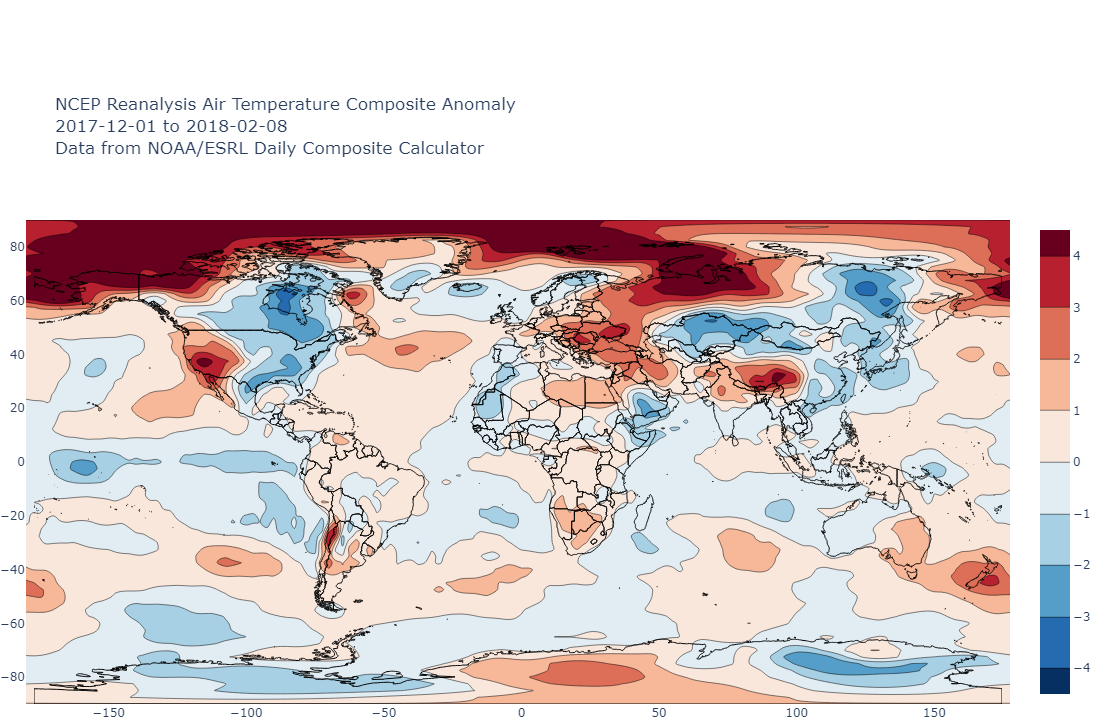

In [25]:
globe = ds['air']
# Rotate to -180 to 180 from 0 to 360
globe.coords['lon'] = (globe.coords['lon'] + 180) % 360 - 180
globe = globe.sortby(globe.lon)
zmin = globe.min().item()
zmax = globe.max().item()
glon = globe['lon']
glat = globe['lat']
fig = go.Figure()
map = go.Scattergeo()
fig.add_trace(map)
contour = go.Contour(z=globe[0,:,:], x=glon, y=glat, colorscale='RdBu_r',zmin=-4.5, zmax=4.5)
fig.add_trace(contour)
fig.update_geos(
    visible=False, resolution=50,
    scope='world',
    bgcolor='rgba(0,0,0,0)',
    showcountries=True, countrycolor="black",
)
fig.update_layout(height=720, margin={"r":0,"t":220,"l":0,"b":0}, title='NCEP Reanalysis Air Temperature ' + ds.attrs['title'] + '<br>2017-12-01 to 2018-02-08<br>Data from NOAA/ESRL Daily Composite Calculator')
fig.show()